In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from pymatgen.util.plotting_utils import get_publication_quality_plot

In [2]:
import numpy as np
import pandas as pd

In [5]:
datafile = pd.read_csv('results.csv')

In [6]:
datafile.head(10)

,filename,ecut,nkpts,alat,energy,total_force,cpu_time
0,Fe_bcc_5.38_7.out,50,40,5.38,-329.263384,0,19.7
1,Fe_bcc_5.38_8.out,50,58,5.38,-329.262011,0,30.0
2,Fe_bcc_5.38_9.out,50,70,5.38,-329.262817,0,36.9
3,Fe_bcc_5.38_10.out,50,94,5.38,-329.263102,0,37.1
4,Fe_bcc_5.38_11.out,50,112,5.38,-329.262501,0,34.8
5,Fe_bcc_5.38_12.out,50,144,5.38,-329.262704,0,51.4
6,Fe_bcc_5.38_13.out,50,168,5.38,-329.262782,0,56.2
7,Fe_bcc_5.39_7.out,50,40,5.39,-329.263356,0,20.1
8,Fe_bcc_5.39_8.out,50,58,5.39,-329.261880,0,30.4
9,Fe_bcc_5.39_9.out,50,70,5.39,-329.262751,0,36.7


In [8]:
gb = datafile.groupby('alat')

In [10]:
gb.groups

{5.3799999999999999: [0, 1, 2, 3, 4, 5, 6],
 5.3899999999999997: [7, 8, 9, 10, 11, 12, 13],
 5.4000000000000004: [14, 15, 16, 17, 18, 19, 20],
 5.4100000000000001: [21, 22, 23, 24, 25, 26, 27],
 5.4199999999999999: [28, 29, 30, 31, 32, 33, 34],
 5.4299999999999997: [35, 36, 37, 38, 39, 40, 41],
 5.4400000000000004: [42, 43, 44, 45, 46, 47, 48],
 5.4500000000000002: [49, 50, 51, 52, 53, 54, 55],
 5.46: [56, 57, 58, 59, 60, 61, 62]}

In [16]:
mini_index_list = []
for k, gp in gb:
#     print 'key=' +str(k)
    df = gb.get_group(k)
    df.drop('total_force',axis=1,inplace=True)
    df_mod = df[df['nkpts']>60]
    minenergy_index = df_mod['energy'].idxmin()
    mini_index_list.append(minenergy_index)
print mini_index_list
    
df_mini_energy = pd.DataFrame(datafile,index=mini_index_list)
df_mini_energy.drop('total_force',axis=1,inplace=True)
df_mini_energy

[3, 10, 17, 24, 31, 38, 45, 52, 59]


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,filename,ecut,nkpts,alat,energy,cpu_time
3,Fe_bcc_5.38_10.out,50,94,5.38,-329.263102,37.1
10,Fe_bcc_5.39_10.out,50,94,5.39,-329.262996,37.3
17,Fe_bcc_5.4_10.out,50,94,5.40,-329.262947,35.5
24,Fe_bcc_5.41_10.out,50,94,5.41,-329.262775,32.2
31,Fe_bcc_5.42_10.out,50,94,5.42,-329.262360,37.6
38,Fe_bcc_5.43_10.out,50,94,5.43,-329.262179,38.1
45,Fe_bcc_5.44_10.out,50,94,5.44,-329.261858,29.4
52,Fe_bcc_5.45_10.out,50,94,5.45,-329.261508,38.1
59,Fe_bcc_5.46_10.out,50,94,5.46,-329.261207,42.8


In [17]:
x = df_mini_energy['alat'].tolist()
y_energy = df_mini_energy['energy'].tolist()

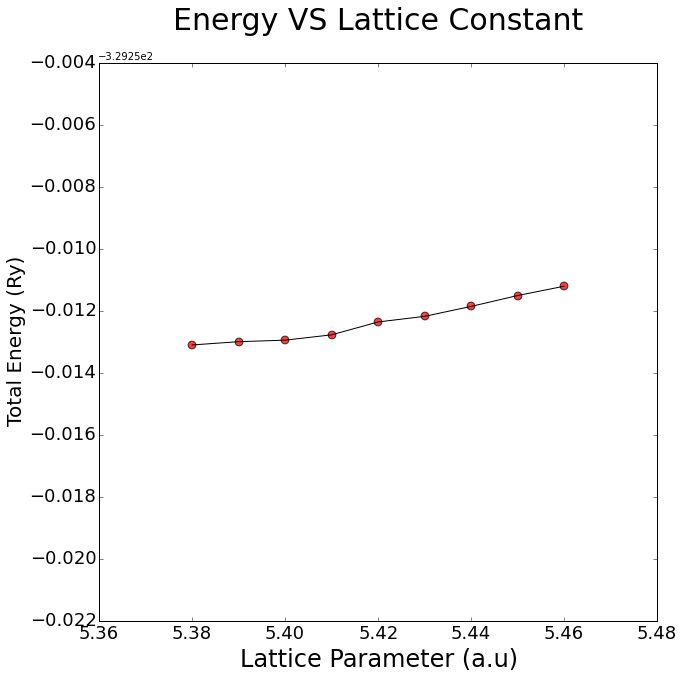

In [18]:
fig, ax0=plt.subplots(nrows=1)
fig.set_size_inches(10,10)

ax0.scatter(x, y_energy,marker='o',alpha=0.75,s=60,c='r')
ax0.plot(x,y_energy,c='black')
ax0.set_title('Energy VS Lattice Constant',fontsize=30,y=1.05)
ax0.set_xlabel('Lattice Parameter (a.u)',fontsize=24)
ax0.set_ylabel(r'Total Energy (Ry)',fontsize=20)
# ax0.set_ylim(-93.456,-93.44)
ax0.tick_params(labelsize = 18)
# ax0.annotate('Lowest Energy: 10.33 a.u.', xy=(10.33, -93.45421),  xycoords='data',
#                 xytext=(-50, -30), textcoords='offset points',
#                 arrowprops=dict(arrowstyle="->",
#                                 connectionstyle="angle3,angleA=0,angleB=-90"),fontsize=15
#                 )

# ax1.scatter(x,y_conver,marker='o',alpha=0.75, s=60,c='b')
# ax1.plot(x,y_conver,c='black')
# ax1.set_title('Force Convergence Vs K-points',fontsize=24,y=1.05)
# ax1.set_xlabel('# of K-points',fontsize=24)
# ax1.set_ylabel(r'Force Converge $meV/\AA$',fontsize=18)
# # ax1.set_yscale('log')
# ax1.set_ylim(-1,40)
# ax1.annotate(r'Convergence < 5 $meV/\AA$ # Kpoints: 205', xy=(207, 5),  xycoords='data',
#                 xytext=(0.95, 0.95), textcoords='axes fraction',
#                 arrowprops=dict(facecolor='black', shrink=0.05),
#                 horizontalalignment='right', verticalalignment='top',fontsize=16
#                 )
# ax1.tick_params(labelsize = 18)

plt.subplots_adjust(hspace=0.5)
plt.show()

In [18]:
plt.show()